In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bayesian_online_changepoint_detection as bcod
% matplotlib inline

In [2]:
series_list = []
for i in range(0,13):
    series_list.append(pd.read_csv('client' + str(i) +'.csv', header=0))

In [3]:
for j in range(0,13):
    rows = []
    for i in range(0,457):
        row ={'day' : i, 'value' : 0}
        if series_list[j][series_list[j]['day'] == i]['value'].empty is not True:
            row['value'] = series_list[j][series_list[j]['day'] == i]['value'].values[0]
        rows.append(row)
    series_list[j] = pd.DataFrame(rows)

Add empty values

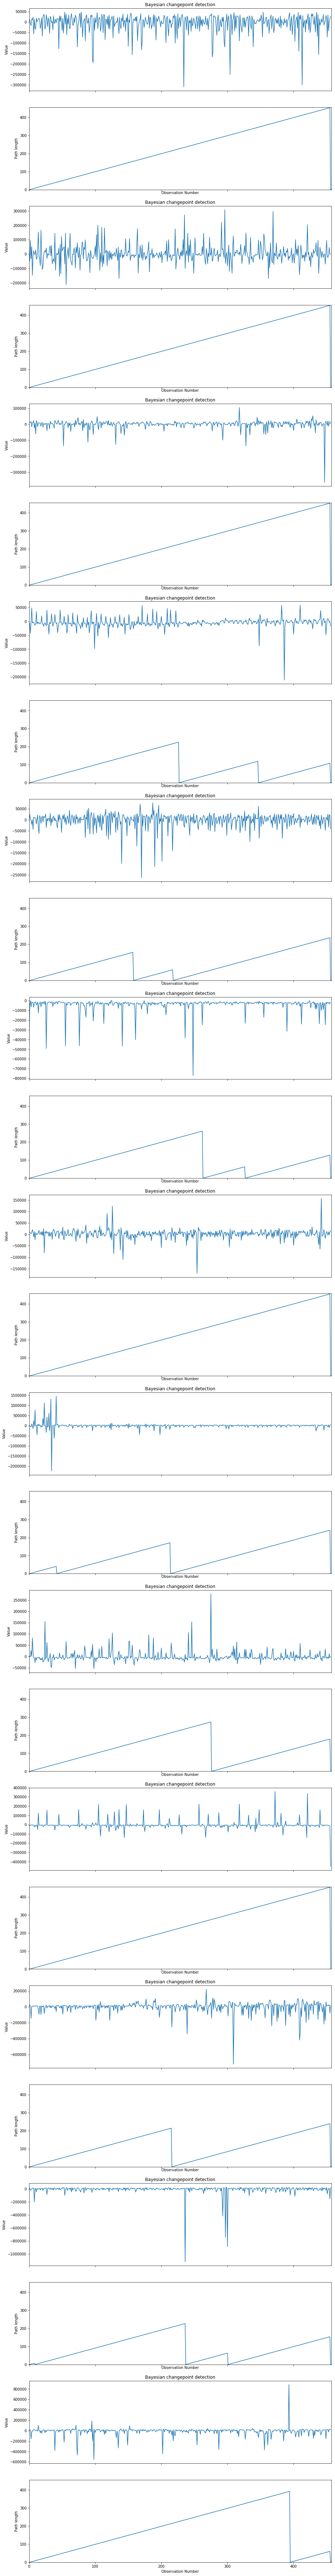

In [7]:
fig, (axes) = plt.subplots(26, 1, figsize=(15,130), sharex=True)
for i in range(0,13):
    series = series_list[i]
    T = len(series_list[i])
    bayes_detector = bcod.Detector(hazard_constant=0.0001, lag=30)
    result, most_probable_path = bayes_detector.inference(series['value'])

    axes[2*i].set_xlim(0, T)
    axes[2*i].set_ylabel('Value')
    axes[2*i].set_title("Bayesian changepoint detection")

    axes[2*i + 1].set_xlim(0, T)
    axes[2*i + 1].set_ylim(0, T)
    axes[2*i + 1].set_ylabel('Path length')
    axes[2*i + 1].set_xlabel('Observation Number')

    axes[2*i].plot(range(0,T), series['value'])
    axes[2*i + 1].plot(range(0,T + 1), most_probable_path)
plt.show()